# Garden Lifestyle Notebook

To start with, all Python libraries which are necessary for later analysis are imported. Garden Lifestyle is also loaded to a Data Frame named _gardenFrame_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
import numpy as np
import re

gardenFrame = pd.read_csv("data/orders_109.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Take a peek at the data set to get a general idea of its structure. This is the latest version of the data set that we have.

In [2]:
gardenFrame.head(5)

,CustomerNR,DoB,CustomerAge,Gender,PoR,OrderNR,OrderID,OrderDate,parsedDate,OrderDay,...,Category,Count,Price,ExpectedArrival,ActualDelivery,ReturnReason,Rating,isBroken,Longitude,Latitude
0,1019099,1984-09-15,35,Man,Loppersum,1606586,101909916065862016-07-12,7-12-2016,2016-07-12,12,...,Garden furniture,1,1049.97,2,2,NaN,2,0,6.746094,53.331473
1,1049989,1969-06-01,50,Man,Goeree-Overflakkee,554370,10499895543702016-01-15,15-01-2016,2016-01-15,15,...,Garden furniture,1,366.90,8,8,NaN,-1,0,4.016667,51.075000
2,1068587,1970-02-19,49,Man,Terneuzen,1146785,106858711467852014-05-16,16-05-2014,2014-05-16,16,...,Garden decoration,1,493.95,2,2,NaN,-1,0,3.840803,51.331784
3,1026863,1972-11-27,47,Man,Sittard-Geleen,1146785,102686311467852014-05-14,14-05-2014,2014-05-14,14,...,Garden furniture,1,234.74,2,5,NaN,-1,0,5.086667,51.000000
4,1049989,1969-06-01,50,Man,Goeree-Overflakkee,554370,10499895543702016-01-15,15-01-2016,2016-01-15,15,...,Garden furniture,1,1436.62,3,8,NaN,-1,0,4.016667,51.075000


In [3]:
gardenFrame.columns

Index(['CustomerNR', 'DoB', 'CustomerAge', 'Gender', 'PoR', 'OrderNR',
       'OrderID', 'OrderDate', 'parsedDate', 'OrderDay', 'OrderMonth',
       'OrderYear', 'ProductNR', 'Subcategory', 'Category', 'Count', 'Price',
       'ExpectedArrival', 'ActualDelivery', 'ReturnReason', 'Rating',
       'isBroken', 'Longitude', 'Latitude'],
      dtype='object')

## Exploratory Data Analysis

This is the initial step in our project, where we just tried to extract as many facts and detect as many problems as possible, based on a set of rules to define what makes a problem a problem.

### Problem definition

__#1__  
Immediately after loading the data set, an error stating that there are mixed types in column OrderDate was received. CHECK THIS AGAIN

Extract time of order placement using regex, but the use of pandas.to_datetime() method (later discovered) is more optimal

__#2__  
There are several entries with identical order identification but the actual orders were placed on different days and different places as well. These entries are the supposed-to-be-unique order IDs from the data set, but in fact contains at least 2 or more orders each.  
Let's have a look at this example:

In [4]:
gardenFrame[ gardenFrame["OrderNR"] == 1146785]

,CustomerNR,DoB,CustomerAge,Gender,PoR,OrderNR,OrderID,OrderDate,parsedDate,OrderDay,...,Category,Count,Price,ExpectedArrival,ActualDelivery,ReturnReason,Rating,isBroken,Longitude,Latitude
2,1068587,1970-02-19,49,Man,Terneuzen,1146785,106858711467852014-05-16,16-05-2014,2014-05-16,16,...,Garden decoration,1,493.95,2,2,NaN,-1,0,3.840803,51.331784
3,1026863,1972-11-27,47,Man,Sittard-Geleen,1146785,102686311467852014-05-14,14-05-2014,2014-05-14,14,...,Garden furniture,1,234.74,2,5,NaN,-1,0,5.086667,51.000000
5,1026863,1972-11-27,47,Man,Sittard-Geleen,1146785,102686311467852014-05-14,14-05-2014,2014-05-14,14,...,Garden hand tools,2,57.40,8,-1,Don't like the article,-1,0,5.086667,51.000000
17,1026863,1972-11-27,47,Man,Sittard-Geleen,1146785,102686311467852014-05-14,14-05-2014,2014-05-14,14,...,Garden hand tools,5,107.00,3,5,NaN,-1,0,5.086667,51.000000
20,1026863,1972-11-27,47,Man,Sittard-Geleen,1146785,102686311467852014-05-14,14-05-2014,2014-05-14,14,...,Lounge furniture,1,1840.50,5,5,NaN,-1,0,5.086667,51.000000
7310,1068587,1970-02-19,49,Man,Terneuzen,1146785,106858711467852014-05-16,16-05-2014,2014-05-16,16,...,Garden furniture,1,383.03,1,3,NaN,-1,0,3.840803,51.331784
7348,1068587,1970-02-19,49,Man,Terneuzen,1146785,106858711467852014-05-16,16-05-2014,2014-05-16,16,...,Garden heating,1,169.28,1,3,NaN,-1,0,3.840803,51.331784
7352,1068587,1970-02-19,49,Man,Terneuzen,1146785,106858711467852014-05-16,16-05-2014,2014-05-16,16,...,Garden furniture,1,232.31,1,3,NaN,-1,0,3.840803,51.331784


As you can see, OrderNR of these 8 entries were identical, but they actually belong to 2 different orders: one from Terneuzen and the other is from Sittard-Geleen

Therefore, the following code block came in handy, which separates these entries and saves those order IDs to a .txt file
The code block took a while to run, but it returns a list of __125359__ entries.

Attempt to encode all those entries with duplicated order IDs but it took too long to complete (more than 29 thousand hours, which is more than 3 years of keeping the machine running continuously). However, the approach of concatenating customer ID, date of the order and the order ID itself produces a new collection of ID strings, each of which is completely unique. Thus, encoding these orders seems to be a redundant task.

Attempt to create a new set of order IDs, using a combination of customer number, date of order and the original order ID itself.

This increases the number of orders from:

In [5]:
len(gardenFrame['OrderNR'].unique())

912095

to:

In [6]:
len(gardenFrame['OrderID'].unique())

1065341

However, this is just an assumption that the order ID is created the moment a customer places an order. There might be a different way these IDs are generated, which needs confirmation from the company's representative.

## Data Addition

### Coordinates of places of residence

The original data set does not have information about coordinates of places of residence, so I went back to this [link](https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/) which we had a chance to exploit in week 3 of the course and was able to obtain a data set which contains coordinates of almost all places of residence in our Garden Lifestyle data set. For the missing values, I wrote a web scraper in JavaScript to fetch coordinates of them from Wikipedia.

In [7]:
city_df = pd.read_csv("data/cities_complete.csv")
city_df.head(5)

,city,longitude,latitude,province,stn_code,stn_name
0,'s-Gravenhage,6.078333,52.040000,Overijssel,275,DEELEN
1,'s-Hertogenbosch,6.011667,51.086667,Gelderland,377,ELL
2,Aa en Hunze,4.043333,51.073333,South Holland,319,WESTDORPE
3,Aalburg,5.096667,52.000000,Gelderland,260,DE BILT
4,Aalsmeer,4.045000,52.013333,South Holland,330,HOEK VAN HOLLAND


Possible addition in the future to this Data Frame could be population and as well as the numbers of customers in each year.

### Age of customers

Seeing that dates of birth of the customers are in only one format YYYY-MM-DD, I extract the age of customers to see the buy trends in different age group

### Weather data

This weather data set was downloaded from this [link](http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi).
The original version was a .txt file, including 2 subsets: 
- coordinates and station codes of 49 weather stations
- weather data set
and their data definition as well as some additional information of the file.  
  
  
The following tasks were carried out in order to incorporate the weather data set with the main one from Garden Lifestyle:
- Used Microsoft Notepad to extract coordinates of weather stations to a separate file and uncommented column names in the original file
- Used Libre Calc to modify and convert the weather data in .txt file into .csv format 
  
  
Next, the following code block merges station names to the weather data set, which originally only separates data using numeric codes of the stations.

In the original weather data set, missing values are replaced with a different number of whitespaces, making it more difficult to see the distribution of values, so I need to replace all missing values with only one conventional "Missing value" using regular expression as well as converting temperature values from 0.1*Celcius degrees to 1*Celcius degree (convert integer values into float values by dividing them by 10)

One thing to notice is that the station with code 265, even though appears in the station coordinates data set, has in fact no weather records. This was removed manually using a text editor to prevent missing values in other data sets when using this data set to merge information.

## A collection of data visualization

While spending some time to explore around the data set and attempting to clean it as much as possible, I composed some data visualization as soon as the required data is ready. First was the monthly net sale form 2013 to 2017.

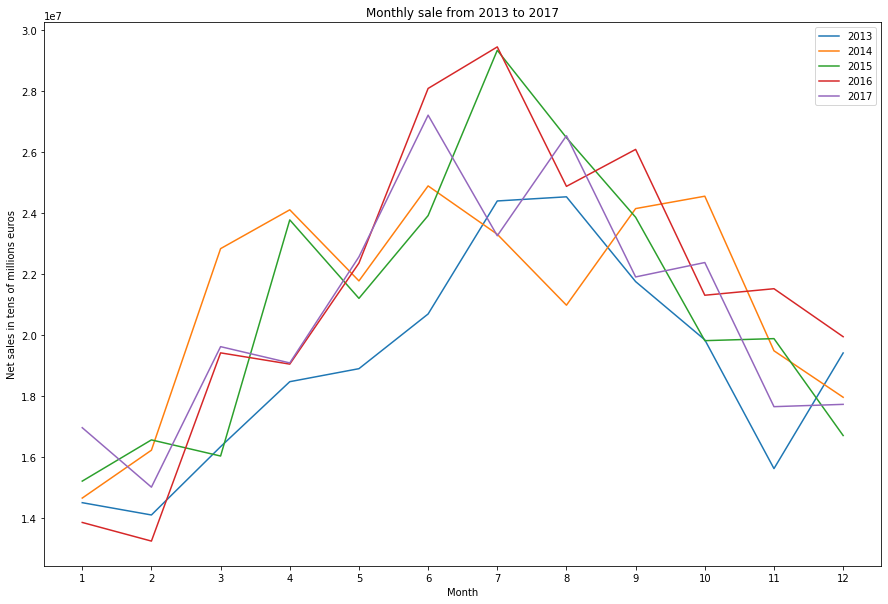

In [8]:
group_by_years = gardenFrame.groupby("OrderYear")

plt.figure(figsize=(15, 10))

for name, group in group_by_years:
    monthly_sales = group.groupby("OrderMonth").sum()
    plt.plot([month for month in range(1,13)], monthly_sales["Price"].values)

plt.ylabel("Net sales in tens of millions euros")
plt.xlabel("Month")
plt.xticks([month for month in range(1,13)], [month for month in range(1,13)])
plt.title("Monthly sale from 2013 to 2017")
plt.legend(group_by_years.groups.keys())
plt.show()

After column CustomerAge was added, it was trivial to plot a graph to see the distribution of sales in different age groups:

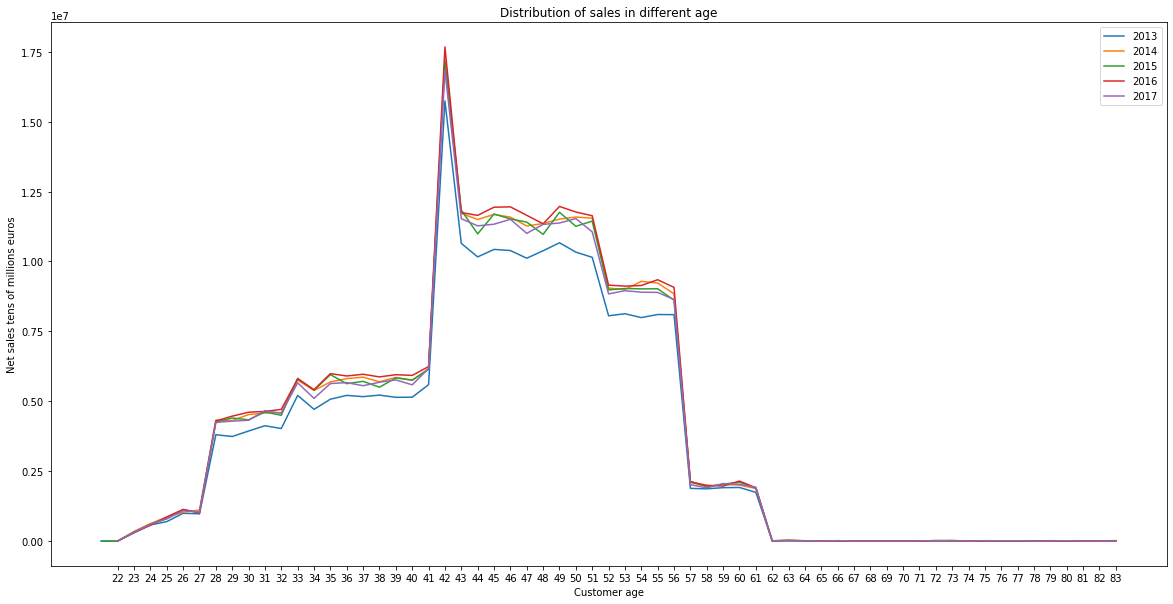

In [9]:
plt.figure(figsize=(20, 10))

for name, group in group_by_years:
    age_sales = group.groupby("CustomerAge").sum()
    plt.plot(age_sales.index, age_sales["Price"].values)
    
plt.xticks(age_sales.index)
plt.ylabel("Net sales tens of millions euros")
plt.xlabel("Customer age")
plt.title("Distribution of sales in different age")
plt.legend(group_by_years.groups.keys())
plt.show()

The total sales of each category in a six-month time interval:

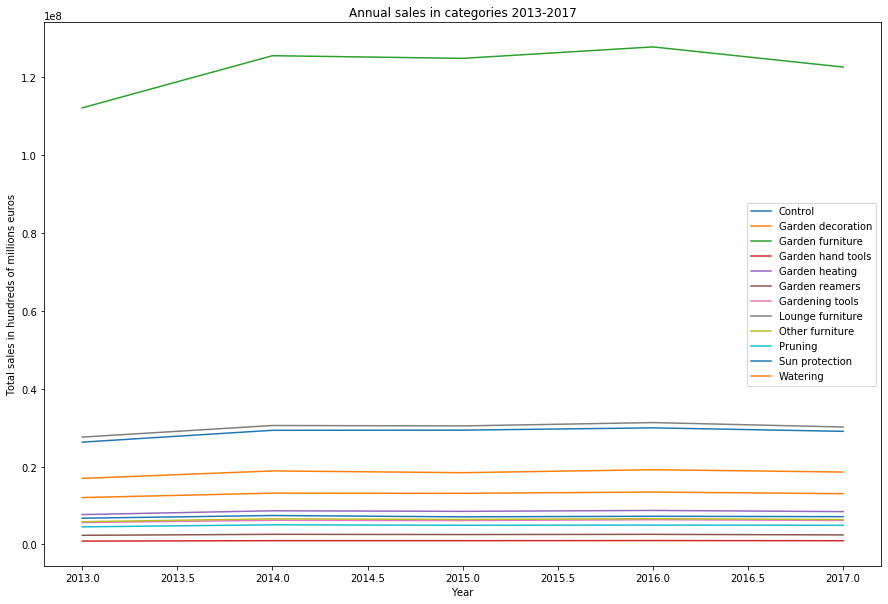

In [10]:
group_by_categories = gardenFrame.groupby("Category")

plt.figure( figsize=(15, 10) )

for name, group in group_by_categories:
    monthly_sales_cate = group.groupby("OrderYear").sum()
    plt.plot(monthly_sales_cate.index, monthly_sales_cate["Price"].values)

plt.ylabel("Total sales in hundreds of millions euros")
plt.xlabel("Year")
plt.title("Annual sales in categories 2013-2017")
plt.legend(group_by_categories.groups.keys())
plt.show()

A graph containing the total sales in a five-year time period of 388 cities/towns was plotted after their coordinates were fetched:

In [11]:
# Net sales in all cities 2013-2017
group_by_cities = gardenFrame.groupby("PoR")
cities_sales_total = pd.DataFrame(columns=["PoR", "Longitude", "Latitude", "Net sales", "Orders"]) 
for name, group in group_by_cities:
    cities_sales_total = cities_sales_total.append({
        "PoR": name,
        "Longitude": group["Longitude"].unique()[0],
        "Latitude": group["Latitude"].unique()[0],
        "Net sales": group["Price"].sum(),
        "Orders": 0
    }, ignore_index=True)

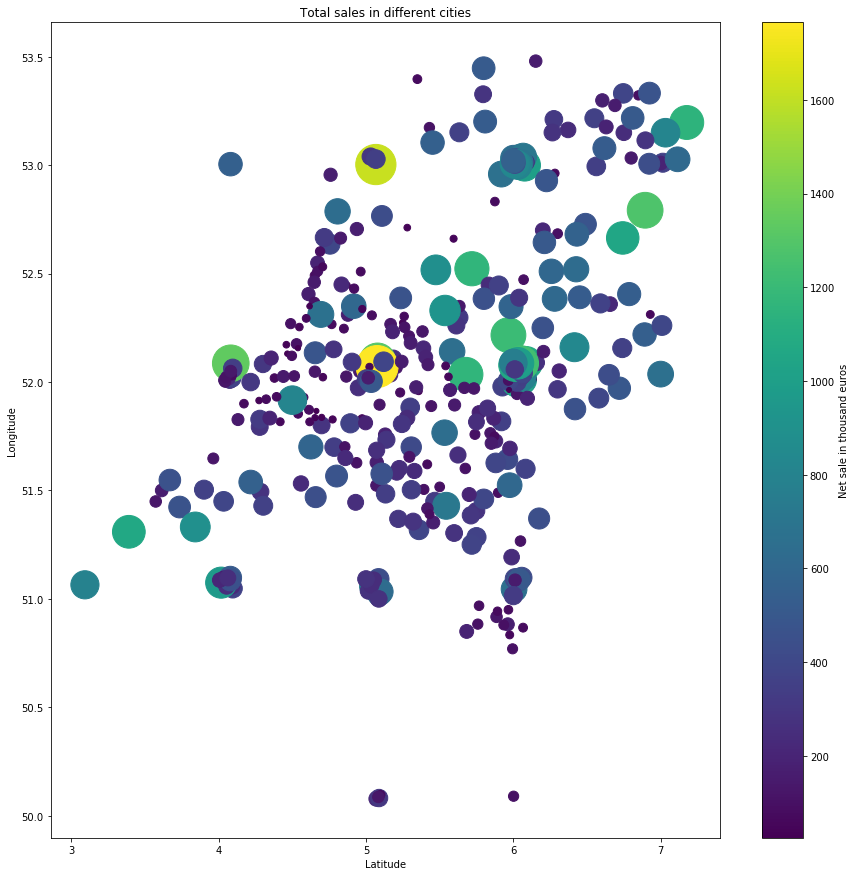

In [12]:
#plot the total net sales 
plt.figure( figsize=(15,15) )

plt.scatter(cities_sales_total["Longitude"], cities_sales_total["Latitude"], s=cities_sales_total["Net sales"]/10000, c=cities_sales_total["Net sales"]/10000)
plt.colorbar(label="Net sale in thousand euros")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Total sales in different cities")
plt.show()

Link places of residence to their nearest weather stations to make weather data usable:

In [13]:
station_df = pd.read_csv('data/station_coords.csv')

There are 49 different stations in the data set fetched from KNMI, whose locations scatter pretty evenly though out the whole country:

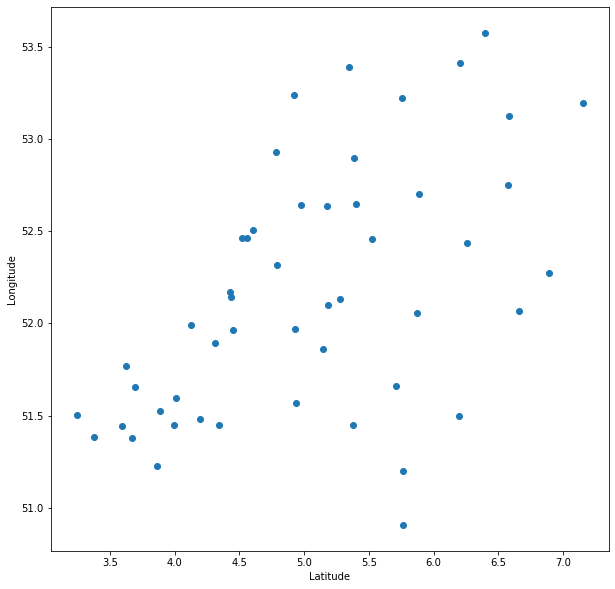

In [14]:
plt.figure( figsize=(10,10) )
plt.scatter(station_df['LON(east)'], station_df['LAT(north)'])
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.show()

Next, match the places of residence to their nearest weather station, and weather data for that specific city/town will be fethed from this station. Theoretically, this reflects the most accurate weather information

The above algorithm can only find the nearest weather station, which is not good enough because in some cases, the data from the nearest is missing, so information about the second nearest and third nearest might be needed

Create new columns:

In [ ]:
city_df['first_stn'] = 0
city_df['second_stn'] = 0
city_df['third_stn'] = 0

Running the code above produces a data frame which looks like this:

In [2]:
pd.read_csv('data/cities_complete.csv').head(10)

,city,lat,lng,admin,population,first_stn,second_stn,third_stn
0,'s-Gravenhage,52.50,4.18,Zuid-Holland,NaN,209,225,391
1,'s-Hertogenbosch,51.70,5.30,Noord-Brabant,NaN,356,370,391
2,Aa en Hunze,53.00,6.76,Drenthe,NaN,280,286,391
3,Achtkarspelen,53.25,6.15,Fryslân,NaN,277,285,391
4,Albrandswaard,51.86,4.40,Zuid-Holland,NaN,343,344,391
5,Alphen-Chaam,51.48,4.95,Noord-Brabant,NaN,350,356,391
6,Ameland,53.45,5.76,Fryslân,NaN,270,277,391
7,Beemster,52.33,4.55,Noord-Holland,NaN,225,257,391
8,Beesel,51.28,6.03,Limburg,NaN,391,380,356
9,Bellingwedde,53.11,7.15,Groningen,NaN,286,290,391


where stn_code is the code of the weather station in used and stn_name is the name of the station.
However, there are 14 out of 49 stations which do not have complete data from 2013-2017 time period. The remaining tasks are to find the most optimal way to impute these missing values and merge weather data with data of orders in an attempt to detect possible trends. 

Merge the link the station code to the entries in the original data set, and after this, it is possible to attach weather columns and start creating models which need weather data

The next step is to set up a new Data Frame which has the following features: order id, order date, price of the order, customer id, por as well as availble weather data

### Explore possibility of further analysis with weather data

The weather data is ready to be incorporated with the original data from Garden Lifestyle now. However, in the data set we received, each order has multiple rows for all the products included in that order. This creates unnecessary heavy weight when attaching weather data as the same weather data must be attached to multiple rows. Therefore, the act to set up a new data set where each order only occupies one row was needed to be done.

First, create a new Data Frame:

Group the original data set by a new collection of order IDs and place of residence of each order:

Start appending new row for each individual order:

Again, the method of attaching station information from previous stages was reused. The output result is saved to a separate file to save the time and computing power in the future:

Now that we have a new data set with only necessary information and is half the size of the original one, merging weather data should take less time and computing power now. However, the date data in the newly created data set was in string data type with the date format like this: YYYY-MM-DD, while in the weather data set, date was stored in format YYYYMMDD and of int64 type. This requires a conversion step in the __gf_id__ dataframe

Add new columns to newly created data set (the default values should be values which are impossible to reach, i.e play the outlier role):

Loop through the newly created data frame and fetch weather data according to date of order and place of residence:

However, there are stations which have missing values. These stations were pushed to an array and saved to a file for further inspection and missing data handling.

A new solution was invented: instead of using only the nearest station, now use the three nearest to minimize the rate of missing values. The following code helps with merging weather data, now that there are 3 weather stations to choose from:

Select only the first 100k rows of data to investigate the correlation between weather and the product categories

# Model training

First, it was advised to define a function to measure the performance of each model created. This way, time can be saved from writing repetitive code of fitting the model and print the results.

## Tree-based model